# **ETL**

### **Climates in Mexico**
**Method**: csv file import in R

In [21]:
library(terra)
library(dplyr)

In [ ]:
getwd()
setwd("../source_data")
directory <- paste(getwd(),"/climate_mx/climate.bil", sep="")
directory

In [38]:
climate <- rast(directory)

In [39]:
# Exploring raster properties
climate

class       : SpatRaster 
dimensions  : 11040, 16320, 1  (nrow, ncol, nlyr)
resolution  : 0.002083333, 0.002083333  (x, y)
extent      : -119, -85, 12, 35  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 
source      : climate.bil 
categories  : CVE_GRUPO, GRUPO, CVE_SUBGR, SUBGRUPO, CVE_TIPO, TIPO, CVE_SUBTIP, SUBTIPO, REG_LLUVIA, LLUV_INVER, TEMP_MED_A, TEMP_MES_F, TEMP_MES_C, FORM_CLIM 
name        : CVE_GRUPO 
min value   :        NA 
max value   :         E 

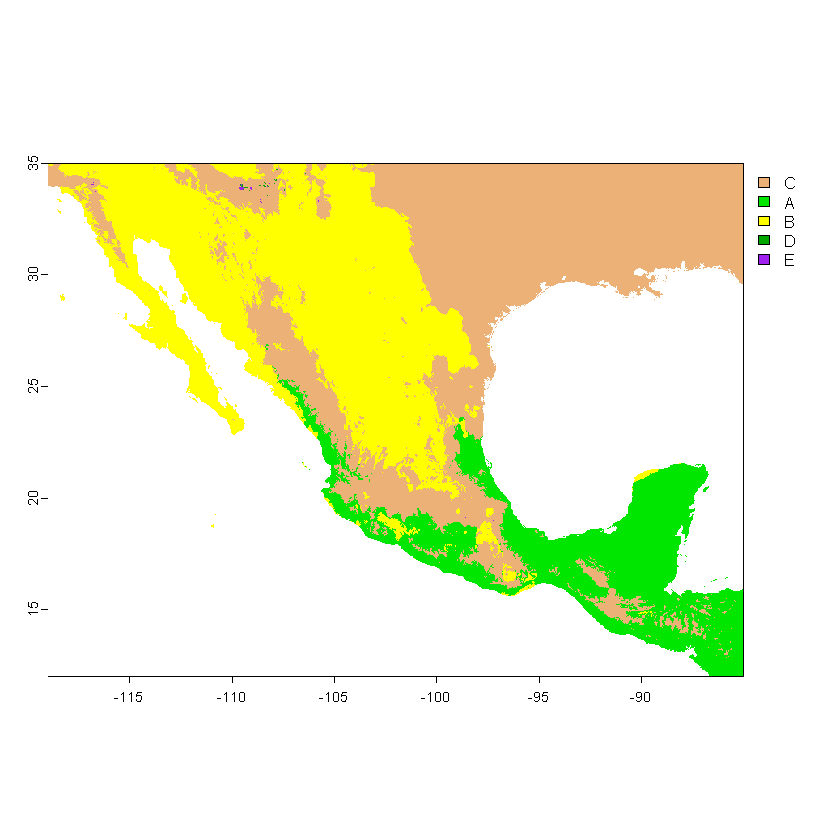

In [55]:
# Map plotting
colors <- c("#ECB176", "#00e600","#FFFF00" , "#00A600", "#A020F0")
plot(climate, col=colors)

In [56]:
# Exploring value for a given point
longitude <- -105
latitude <- 30

point <- vect(cbind(longitude, latitude), crs=crs(climate))

value<- extract(climate, point)
value

ID,CVE_GRUPO
<dbl>,<fct>
1,B


In [57]:
# Exploring values for a list of points
longitude <- c(-105,-90, -95)
latitude <- c(30, 17, 30)

point <- vect(cbind(longitude, latitude), crs=crs(climate))

value<- extract(climate, point)
value

ID,CVE_GRUPO
<dbl>,<fct>
1,B
2,A
3,C


In [ ]:
# Getting the world cities file
wc_directory <- paste(getwd(), "/World_cities.csv",sep="")

wc_directory

In [62]:
# Reading and exploring world cities by longitude and latitude
world_cities <- read.csv(wc_directory)
head(world_cities)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
1,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000,1392685764
2,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000,1360771077
3,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000,1356872604
4,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000,1156237133
5,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000,1356226629
6,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,24922000,1608618140


In [63]:
# Filtering Mexican cities
mexican_cities <- world_cities %>%
    select(city, country,lat,lng)%>%
    filter(country == "Mexico") %>%
    select(city,lat, lng)

head(mexican_cities)

,city,lat,lng
,<chr>,<dbl>,<dbl>
1,Mexico City,19.4333,-99.1333
2,Guadalajara,20.6767,-103.3475
3,Monterrey,25.6667,-100.3000
4,Tijuana,32.5250,-117.0333
5,Ecatepec,19.6097,-99.0600
6,León de los Aldama,21.1167,-101.6833


In [64]:
mexican_cities_1 <- mexican_cities %>%
    select(lat,lng)
    
head(mexican_cities_1)

,lat,lng
,<dbl>,<dbl>
1,19.4333,-99.1333
2,20.6767,-103.3475
3,25.6667,-100.3000
4,32.5250,-117.0333
5,19.6097,-99.0600
6,21.1167,-101.6833


In [66]:
# Extracting the climate group by longitude and latitud
longitude <- mexican_cities[["lng"]]
latitude <- mexican_cities[["lat"]]
point <- vect(cbind(longitude, latitude), crs=crs(climate))
value<- extract(climate, point)
mexican_cities <-cbind(mexican_cities,value)
mexican_cities <-mexican_cities %>%
  select(city, lat, lng, CVE_GRUPO)
mexican_cities <- rename(mexican_cities, group = CVE_GRUPO)
head(mexican_cities)


,city,lat,lng,group
,<chr>,<dbl>,<dbl>,<fct>
1,Mexico City,19.4333,-99.1333,C
2,Guadalajara,20.6767,-103.3475,C
3,Monterrey,25.6667,-100.3000,C
4,Tijuana,32.5250,-117.0333,B
5,Ecatepec,19.6097,-99.0600,C
6,León de los Aldama,21.1167,-101.6833,B


In [ ]:
getwd()
setwd("../auxiliary")


In [ ]:
# Saving table
getwd()
setwd("../auxiliary")
file_path <- getwd()
write.csv(mexican_cities, "climate_mx.csv")
